In [75]:
#importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
#loading datasets
import pandas as pd

# Load the dataset with headers
path = r"C:\Users\hibas\Desktop\Self_Learning\Project_2_Breast_Cancer_Prediction_using_SVM\breast_cancer_data.csv"
data = pd.read_csv(path)

# Drop the 'id' column (not useful for prediction)
data.drop('id', axis=1, inplace=True)

# Confirm structure
print(data.head())
print(data.columns)


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [65]:
data = data.drop(columns=["id"])

In [66]:
# Label M as 1, B as 0
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})


In [67]:
#split feature and target
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]


In [68]:
#train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [69]:
#scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
#train SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



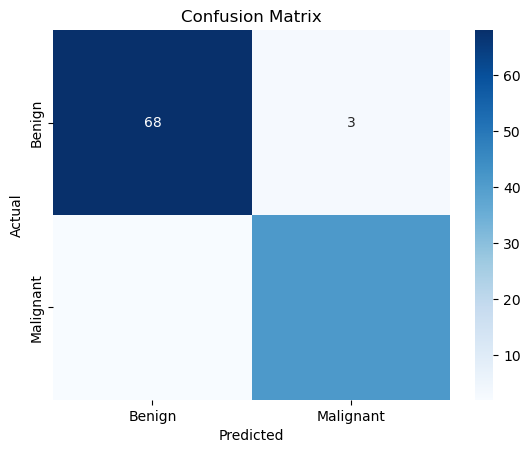

In [76]:
#data visualization
#heat map
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


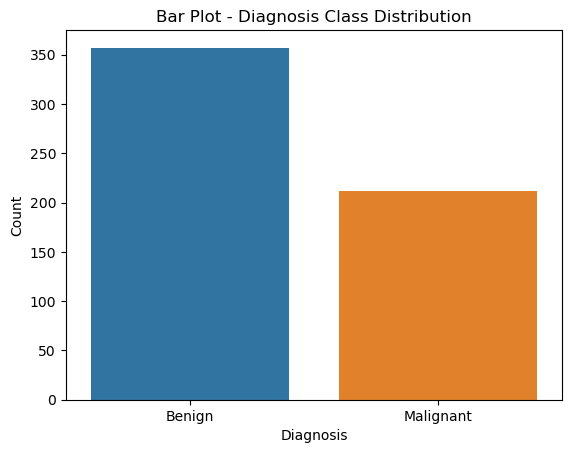

In [83]:
#bar plot
sns.countplot(x='diagnosis', data=data)
plt.title('Bar Plot - Diagnosis Class Distribution')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

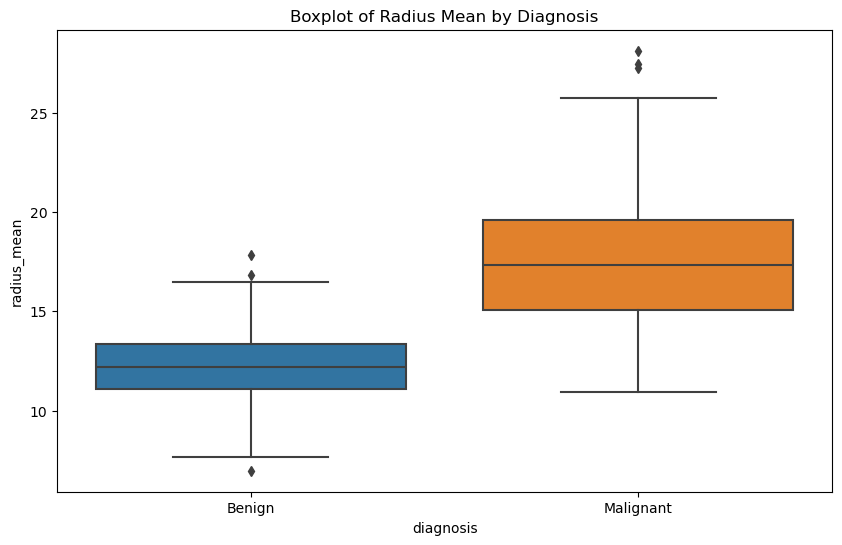

In [78]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()


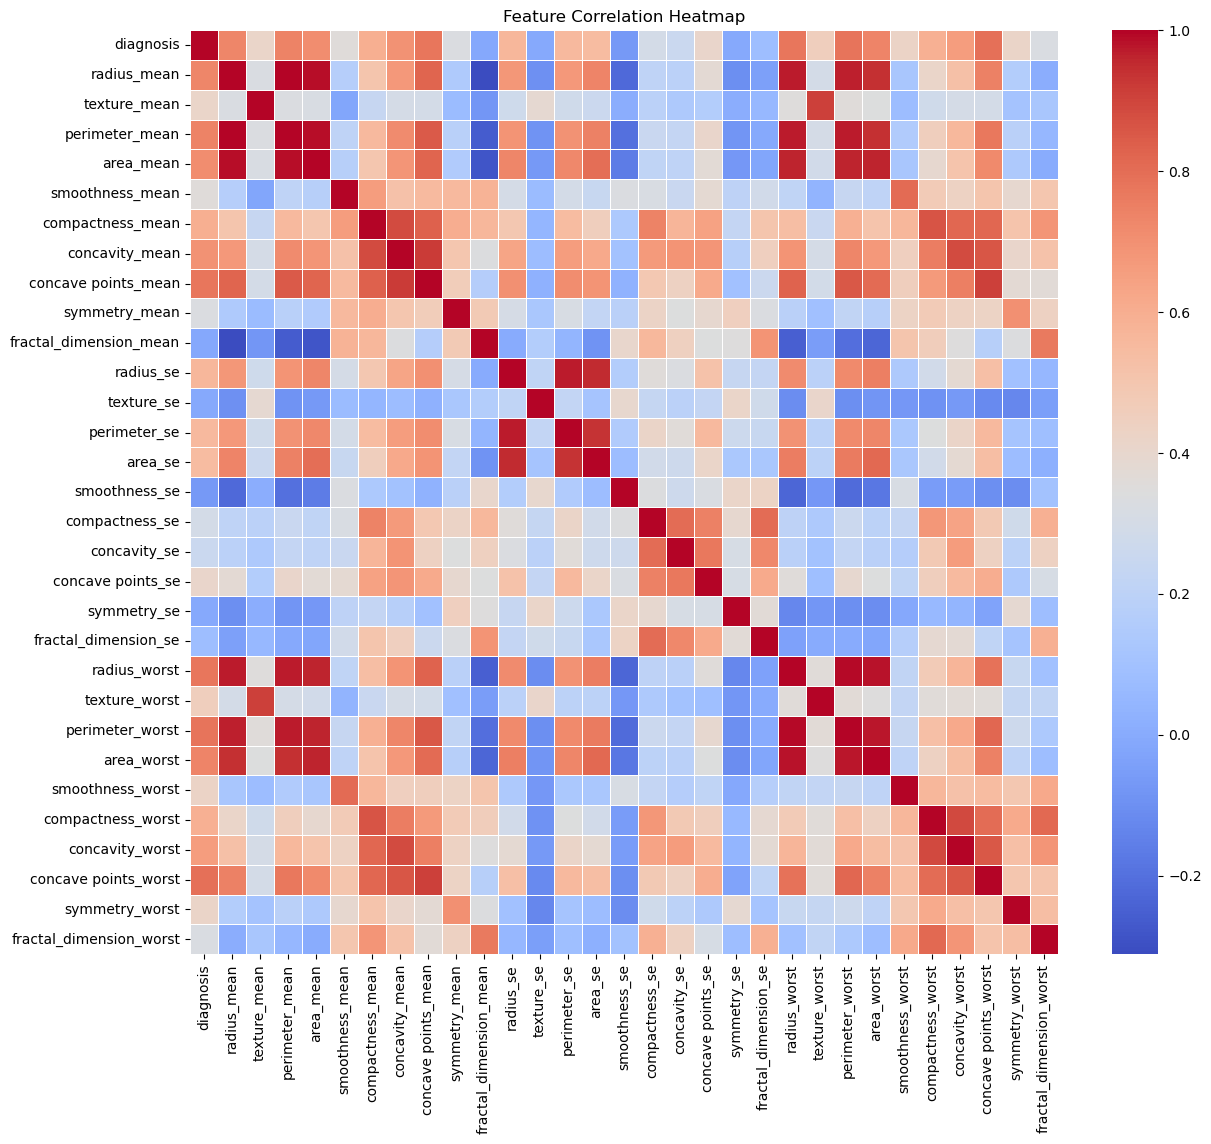

In [79]:
#correlation heat map
plt.figure(figsize=(14,12))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

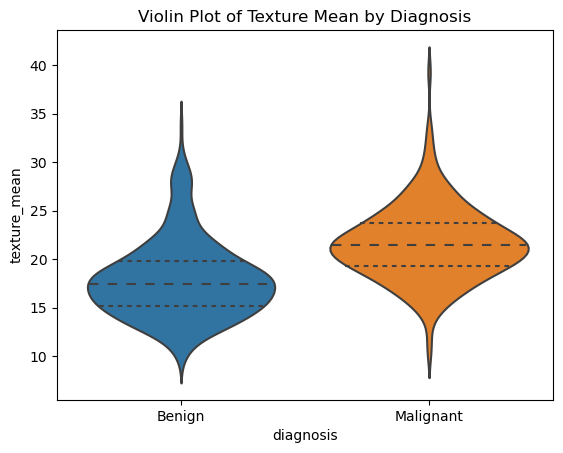

In [80]:
#violin plot
sns.violinplot(x='diagnosis', y='texture_mean', data=data, inner='quartile')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Violin Plot of Texture Mean by Diagnosis')
plt.show()


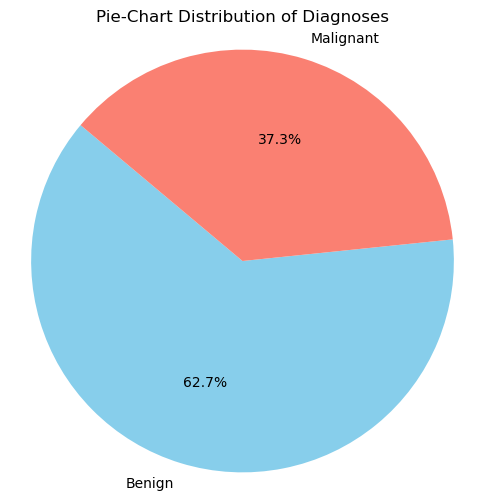

In [82]:
#pie chart
# Count values
diagnosis_counts = data['diagnosis'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(diagnosis_counts, labels=['Benign', 'Malignant'], 
        autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Pie-Chart Distribution of Diagnoses')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


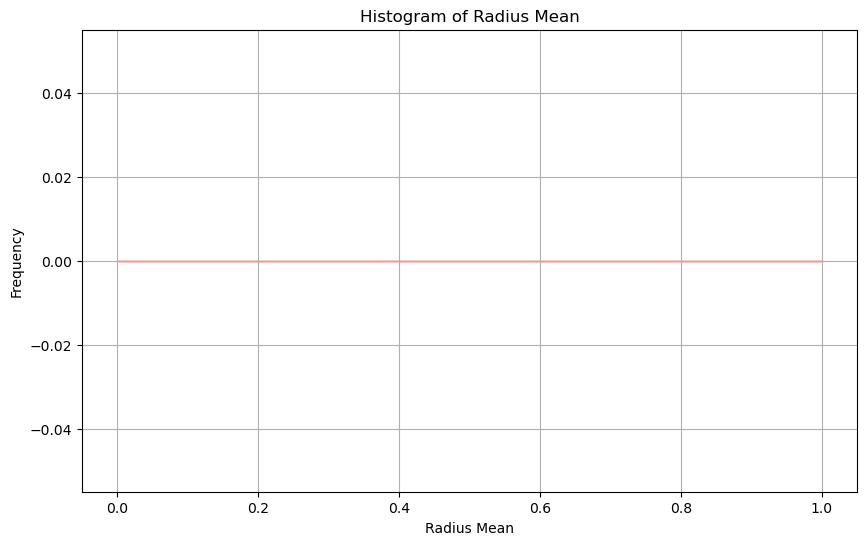

In [94]:
#Histogram
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['radius_mean'], bins=30, color='blue', edgecolor='red')
plt.title("Histogram of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
